# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [3]:
# import libraries here
import pandas as pd
import seaborn as sns

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
# your answer here
temp = pd.read_csv('Temp_States.csv')

#### Print `temp`

In [3]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

## #your answer here

We have 2 categorical columns and one column with numbers (floats)


#### Select the rows where state is New York

In [6]:
# your answer here
new_york_df = temp[temp['State'] == 'New York']
new_york_df

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [8]:
# your answer here
average_temp = new_york_df['Temperature'].mean()
average_temp

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [11]:
# your answer here
high_temp_cities = temp.loc[temp['Temperature'] > 15, ['City', 'State']]
high_temp_cities

,City,State
0,NYC,New York
3,Hartford,Connecticut
5,Treton,New Jersey
6,Newark,New Jersey


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [18]:
# your answer here
high_temp_city = high_temp_cities['City']
high_temp_city

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [22]:
# your answer here
selected_cities = temp.loc[(temp['Temperature'] > 15) & (temp['Temperature'] < 20), 'City']
selected_cities

0         NYC
3    Hartford
Name: City, dtype: object

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [26]:
# Calculate the mean and standard deviation of temperature for each state
state_temp_stats = temp.groupby('State')['Temperature'].agg(['mean', 'std'])

# Rename the columns 
state_temp_stats = state_temp_stats.rename(columns={'mean': 'mean', 'std': 'std'})

In [27]:
# Merge the temperature statistics back into the original DataFrame
temp = pd.merge(temp, state_temp_stats, on='State')

In [28]:
temp

,City,State,Temperature,temp_mean,temp_std,mean,std
0,NYC,New York,19.444444,10.740741,8.133404,10.740741,8.133404
1,Albany,New York,9.444444,10.740741,8.133404,10.740741,8.133404
2,Buffalo,New York,3.333333,10.740741,8.133404,10.740741,8.133404
3,Hartford,Connecticut,17.222222,15.833333,1.964186,15.833333,1.964186
4,Bridgeport,Connecticut,14.444444,15.833333,1.964186,15.833333,1.964186
5,Treton,New Jersey,22.222222,21.111111,1.571348,21.111111,1.571348
6,Newark,New Jersey,20.000000,21.111111,1.571348,21.111111,1.571348


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [29]:
# your answer here
employee = pd.read_csv('Employee.csv')

#### Explore the data types of the Temp dataframe. Comment your results

In [30]:
# your answer here
employee

# we have several categorial variables, a few boolean, and 2 integer variables

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

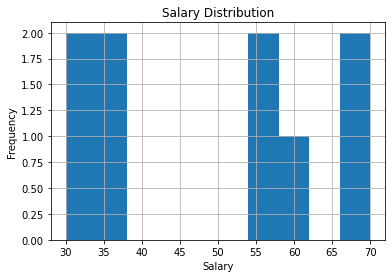

In [32]:
# your answer here
import matplotlib.pyplot as plt

# Create a histogram of the "salary" column
employee['Salary'].hist()

# Add labels and title to the plot
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution')
plt.show()


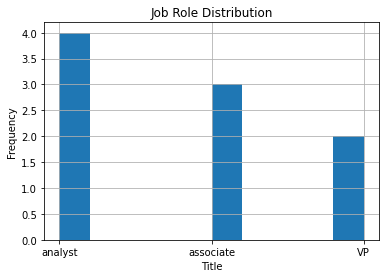

In [33]:
# Create a histogram of the "salary" column
employee['Title'].hist()

# Add labels and title to the plot
plt.xlabel('Title')
plt.ylabel('Frequency')
plt.title('Job Role Distribution')
plt.show()


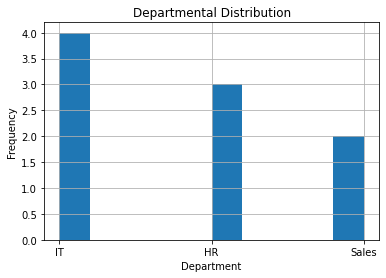

In [37]:
employee['Department'].hist()

# Add labels and title to the plot
plt.xlabel('Department')
plt.ylabel('Frequency')
plt.title('Departmental Distribution')
plt.show()


#### What's the average salary in this company?

In [39]:
# your answer here
avg_salary = employee['Salary'].mean()
avg_salary

48.888888888888886

#### What's the highest salary?

In [41]:
# your answer here
max_salary = employee['Salary'].max()
max_salary

70

#### What's the lowest salary?

In [43]:
# your answer here
min_salary = employee['Salary'].min()
min_salary

30

#### Who are the employees with the lowest salary?

In [47]:
# your answer here
peasant =  employee.sort_values(by='Salary').head()

#we can see that there are 2 with 30k salary so we run the next line:

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
0,Jose,IT,Bachelor,M,analyst,1,35
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


In [49]:
peasant = employee.nsmallest(n=2, columns='Salary')
peasant

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [51]:
# your answer here
david = employee.loc[employee['Name'] == 'David']
david

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [53]:
# your answer here
david_salary = david.loc[david['Name'] == 'David', 'Salary'].values[0]
david_salary

30

#### Print all the rows where job title is associate

In [54]:
# your answer here
aso = employee.loc[employee['Title'] == 'associate']
aso

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [55]:
# your answer here- 1 method
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [56]:
# your answer here- 2nd method
employee.iloc[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [59]:
# your answer here
aso_paid = employee.loc[(employee['Title'] == 'associate') & (employee['Salary'] > 55)]
aso_paid

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [61]:
# your answer here
tenure = employee.groupby('Years')['Salary'].agg('mean')
tenure


Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64

####  What is the average Salary per title?

In [63]:
# your answer here
average_salary_by_title = employee.groupby('Title')['Salary'].mean()
average_salary_by_title

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

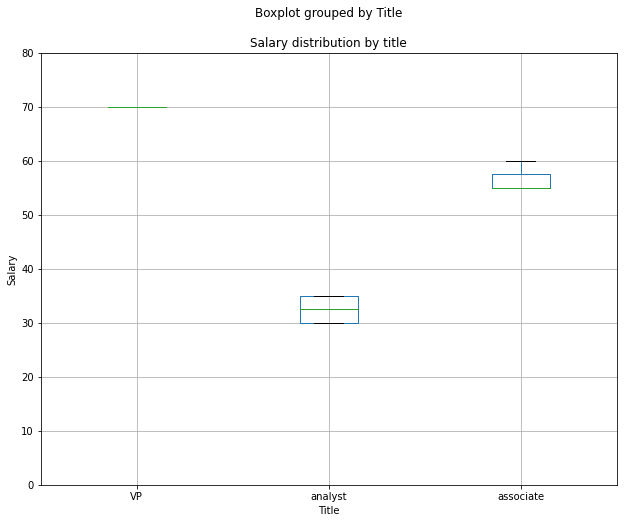

In [74]:
# draw boxplot here
employee.boxplot(column='Salary', by='Title', figsize=(10, 8))
plt.title('Salary distribution by title')
plt.ylabel('Salary')
plt.ylim(0, 80)
plt.show()

In [76]:
# print first quartile here
first_quartile = employee['Salary'].quantile(q=0.25)

print("First quartile:", first_quartile)



First quartile: 35.0


In [77]:
# print third quartile here
third_quartile = employee['Salary'].quantile(q=0.75)
print("Third quartile:", third_quartile)


Third quartile: 60.0


#### Is the mean salary per gender different?

In [79]:
# your answer here
salary_by_gender = employee.groupby('Gender')['Salary'].mean()
salary_by_gender


Gender
F    47.5
M    50.0
Name: Salary, dtype: float64

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [82]:
# your answer here
numeric_cols = ['Years', 'Salary']
stats_by_department = employee.groupby('Department')[numeric_cols].agg(['min', 'mean', 'max'])
stats_by_department


Years               Salary           
             min      mean max    min   mean max
Department                                      
HR             2  4.666667   8     30  45.00  70
IT             1  4.500000   8     30  48.75  70
Sales          2  2.500000   3     55  55.00  55

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [32]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [4]:
# your answer here
orders = pd.read_csv('Orders.csv')
orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,541904,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397920,541905,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397921,541906,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397922,541907,581587,23255,2011,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [86]:
# your answer here
data_types = orders.dtypes
print(data_types)


Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object


####  What is the average Purchase Price?

In [88]:
# your answer here
avg_spend = orders['amount_spent'].mean()
avg_spend

22.394748504739596

#### What were the highest and lowest purchase prices? 

In [92]:
# your answer here
max_spend = orders['amount_spent'].max()
min_spend = orders['amount_spent'].min()

In [94]:
# your answer here
max_spend


168469.6

In [95]:
min_spend

0.0

#### Select all the customers we have in Spain

In [97]:
# your answer here

spain = orders.loc[orders['Country'] == 'Spain']
spain

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394733,535271,581193,23291,2011,12,3,17,dolly girl childrens cup,2,2011-12-07 17:05:00,1.25,17097,Spain,2.50
394734,535272,581193,85232D,2011,12,3,17,set/3 decoupage stacking tins,1,2011-12-07 17:05:00,4.95,17097,Spain,4.95
394735,535273,581193,22721,2011,12,3,17,set of 3 cake tins sketchbook,2,2011-12-07 17:05:00,1.95,17097,Spain,3.90
394736,535274,581193,23241,2011,12,3,17,treasure tin gymkhana design,1,2011-12-07 17:05:00,2.08,17097,Spain,2.08


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [109]:
# your answer here
spain.value_counts('CustomerID')

CustomerID
12540    478
12484    346
12539    273
17097    211
12597    206
12502    147
12556    121
12546     69
12462     62
12354     58
12550     57
12541     52
12545     50
12455     48
12421     45
12510     33
12557     33
12596     27
12417     23
12507     22
12448     22
12538     21
12544     19
12454     15
12442     12
12551     10
12450      8
12547      8
12548      5
12445      4
dtype: int64

#### Select all the customers who have bought more than 50 items ?

In [110]:
# your answer here
customers_more_than_50 = orders.groupby('CustomerID')['Quantity'].sum() > 50
customers_more_than_50 = customers_more_than_50[customers_more_than_50].index.tolist()


#### Select orders from Spain that are above 50 items

In [104]:
# your answer here
spain_orders_above_50 = orders[(orders['Country'] == 'Spain') & (orders['Quantity'] > 50)]
spain_orders_above_50


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
32454,52416,540785,84997B,2011,1,2,11,red 3 piece retrospot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
32455,52417,540785,84997D,2011,1,2,11,pink 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32456,52418,540785,84997C,2011,1,2,11,blue 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32457,52419,540785,84997A,2011,1,2,11,green 3 piece polkadot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
91155,136767,547972,22383,2011,3,1,16,lunch bag suki design,150,2011-03-28 16:41:00,1.45,12557,Spain,217.50


#### Select all free orders

In [106]:
# your answer here
spain_free = orders[(orders['Country'] == 'Spain') & (orders['amount_spent'] == 0)]
spain_free

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
197173,282912,561669,22960,2011,7,4,17,jam making set with jars,11,2011-07-28 17:09:00,0.0,12507,Spain,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [111]:
# your answer here
lunch_bag_orders = orders[orders['Description'].str.contains('lunch bag')]
lunch_bag_orders



,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [118]:
# your answer here
lunch_bag_orders_2011 = orders[(orders['Description'].str.contains('lunch bag') & (orders['year'] == 2011))]
lunch_bag_orders_2011


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Show the frequency distribution of the amount spent in Spain.

In [123]:
# your answer here
# Select orders from Spain
orders_spain = orders[orders['Country'] == 'Spain']

# Calculate the IQR for the "AmountSpent" column
q1 = orders_spain['amount_spent'].quantile(0.25)
q3 = orders_spain['amount_spent'].quantile(0.75)
iqr = q3 - q1

# Calculate the lower and upper bounds for outliers
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

# Filter the orders_spain dataframe to exclude outliers
orders_spain_filtered = orders_spain[(orders_spain['amount_spent'] >= lower_bound) & (orders_spain['amount_spent'] <= upper_bound)]

# Calculate the frequency distribution of the filtered amounts
freq_dist = orders_spain_filtered['amount_spent'].value_counts()
print(freq_dist)


15.00    186
17.70    122
19.80     99
17.40     86
10.20     76
        ... 
29.88      1
0.42       1
11.52      1
23.90      1
3.36       1
Name: amount_spent, Length: 225, dtype: int64


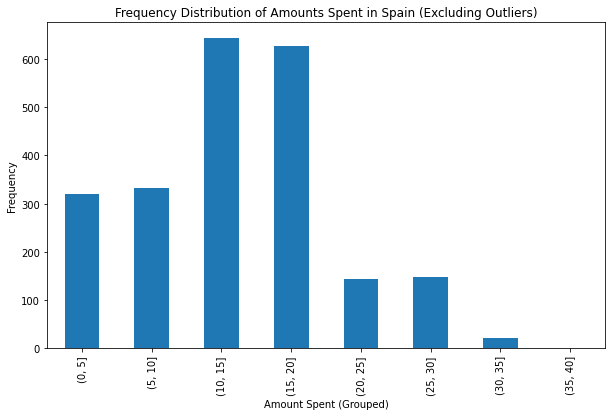

In [129]:
# Group the amounts spent into bins
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40]
freq_dist_binned = pd.cut(orders_spain_filtered['amount_spent'], bins=bins)

# Plot the binned frequency distribution
plt.figure(figsize=(10,6))
freq_dist_binned.value_counts().sort_index().plot(kind='bar')
plt.title('Frequency Distribution of Amounts Spent in Spain (Excluding Outliers)')
plt.xlabel('Amount Spent (Grouped)')
plt.ylabel('Frequency')
plt.show()



#### Select all orders made in the month of August

In [132]:
# your answer here
orders_aug = orders[orders['month'] == 8]
orders_aug
# employee.loc[employee['Title'] == 'associate']

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,320688,565067,22644,2011,8,3,17,ceramic cherry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226484,320689,565067,22645,2011,8,3,17,ceramic heart fairy cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226485,320690,565067,22637,2011,8,3,17,piggy bank retrospot,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10
226486,320691,565067,22646,2011,8,3,17,ceramic strawberry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [134]:
# your answer here
orders_august_by_country = orders_aug.groupby('Country').size()
orders_august_by_country

Country
Australia            107
Austria               88
Belgium              194
Canada                 5
Channel Islands      140
Denmark               16
EIRE                 593
Finland               61
France               569
Germany              795
Iceland               22
Israel               171
Italy                 95
Malta                 55
Netherlands          280
Norway                77
Poland                17
Portugal              41
Spain                252
Sweden                40
Switzerland          267
United Kingdom     23105
Unspecified           23
dtype: int64

#### What's the  average amount of money spent by country

In [135]:
# your answer here
orders_avg = orders[orders['Country'] == 'Spain'].mean()

/tmp/ipykernel_456733/282174854.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  orders_avg = orders[orders['Country'] == 'Spain'].mean()


#### What's the most expensive item?

In [140]:
# your answer here
expenny = orders['UnitPrice'].max()
expenny

8142.75

#### What was the average amount spent per year ?

In [7]:
avg_spending_by_country = orders.groupby('Country')['amount_spent'].mean()
avg_spending_by_country

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia